
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    System 2 - Homework 1<br>
<font color=2565AE size=5>
    Spring 2025<br>
<font color=3C99D size=5>
    NeuroSymbolic <br>


---

### Student Number = 403206519

### Full Name = Fatemeh Shahhosseini

---

# 🚀 Neurosymbolic Exercise  
## **Generating Programs with Seq2Seq Models**  
### 🌟 **Why It Matters**  
Program generation using seq2seq models is a common practice in building up **Neurosymbolic structures**. In this framework:  
- <span style="color:blue">**Programs**</span> act as **symbols**.  
- <span style="color:green">**Seq2Seq models**</span> serve as **neural structures**.  

The program space is a **compositional space**, enabling AI systems to solve a wide range of tasks. Therefore, searching and generating programs using **powerful neural structures** can be seen as a neurosymbolic structure — leading to more **interpretable** and **generalizable** AI systems.  

---

### 🎯 **The Particular Problem**  
In this exercise, you will explore how to generate programs using a sequence-to-sequence (seq2seq) model to solve a **Visual Question Answering (VQA)** task.




> **VQA** is a challenging task that combines natural language understanding and visual reasoning — the model needs to process an image and a question about the image, then generate a correct answer.


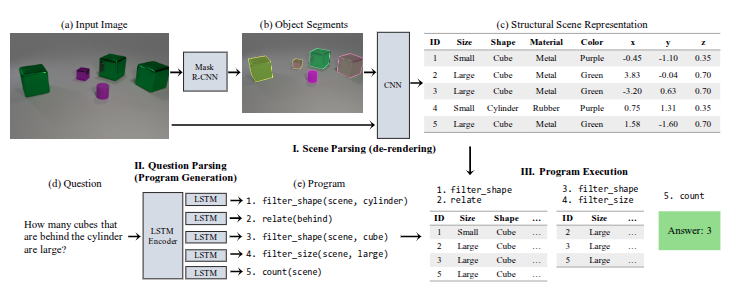





For more details of the Architecture, see [VQA](https://proceedings.neurips.cc/paper_files/paper/2018/file/5e388103a391daabe3de1d76a6739ccd-Paper.pdf)

In this exercise, you will focus on the **program generation** part — **not** processing images to generate scenes. The generated programs will represent the reasoning steps required to answer the question, bridging **neural** and **symbolic** processing — a key aspect of neurosymbolic models.  

---

### 🎯 **Learning Objectives**  
By the end of this assignment, you should be able to:  

✅ **Create and preprocess** a dataset for program generation in the context of VQA.  
   - However, the techniques here can be applied in general contexts.  

✅ **Understand and implement** the following learning strategies to train seq2seq models for producing programs:  
- 🟠 **Supervised Learning** – Train a seq2seq model using ground truth programs.  
- 🔵 **Reinforcement Learning (RL)** – Improve program generation by rewarding programs that produce correct answers.  
- 🟢 **In-Context Learning (ICL) with Large Language Models (LLMs)** – Use examples and prompts to guide LLMs to generate programs without explicit training.  

✅ **Evaluate** the strengths and weaknesses of each approach.  

---
### 🎯 **General Instruction**

Dear Students, please write clean codes with comments and provide explanation any where about your implementation in comments if necessary. Furthermore, we have some private data to evaluate your trained model on them.

---


### **Getting Familiar with Preprocessing and Dataset Creation**

In this section, you are going to understand the structure of data you are going to work with. Furtheremore, you are going to be familiar with common practice of preprocessing and creating dataset which is going to be used for building a seq2seq model to generate programs(symbols).

#### Downloding CLEVR Dataset

Please first download the CLEVR Dataset from this link: https://drive.google.com/file/d/1_AtOysdMraIdLbbmAzC2x862Jd7xQDQ7/view?usp=sharing

Then, you must unzip the downloaded file and put it beside this notebook.

In [1]:
from google.colab import drive
drive.mount('/content/drive' ,force_remount=True)

Mounted at /content/drive


#### Questions and Programs

In [2]:
# !unzip /content/drive/MyDrive/CELVR_Dataset.zip

In the following link, you need to print one item of test question dataset and examine its content.

In [3]:
import json
PathTrainQuestionsDataset =  "/content/drive/MyDrive/NeuroSymbolic/CELVR_Dataset/Questions/CLEVR_train_questions.json"
PathTestQuestionsDataset =  "/content/drive/MyDrive/NeuroSymbolic/CELVR_Dataset/Questions/CLEVR_test_questions.json"

with open(PathTestQuestionsDataset , 'r') as f:
    Questiondata_test = json.load(f)['questions']

with open(PathTestQuestionsDataset , 'r') as f:
    Questiondata_train = json.load(f)['questions']

### Print an example in the list of Questiondata
Questiondata_train[0]

{'image_index': 6216,
 'program': [{'inputs': [], 'function': 'scene', 'value_inputs': []},
  {'inputs': [0], 'function': 'filter_color', 'value_inputs': ['yellow']},
  {'inputs': [1], 'function': 'filter_material', 'value_inputs': ['rubber']},
  {'inputs': [2], 'function': 'unique', 'value_inputs': []},
  {'inputs': [3], 'function': 'same_shape', 'value_inputs': []},
  {'inputs': [4], 'function': 'exist', 'value_inputs': []}],
 'question_index': 62154,
 'image_filename': 'CLEVR_val_006216.png',
 'question_family_index': 39,
 'split': 'val',
 'answer': 'yes',
 'question': 'Are there any other things that are the same shape as the yellow matte object?'}

#### Scenses

In the following link, you need to print one item of test question dataset and examine its content.

In [ ]:
PathTestScensesDataset =  "/content/drive/MyDrive/NeuroSymbolic/CELVR_Dataset/Scenses/CLEVR_test_scenes.json"

with open(PathTestScensesDataset , 'r') as f:
    Scensdata = json.load(f)["scenes"]


### Print an example in the list of Scenes
Scensdata[0]

{'image_index': 0,
 'objects': [{'color': 'brown',
   'size': 'large',
   'rotation': 178.92387258999463,
   'shape': 'cylinder',
   '3d_coords': [-1.4937210083007812, -1.9936031103134155, 0.699999988079071],
   'material': 'rubber',
   'pixel_coords': [119, 131, 10.801968574523926]},
  {'color': 'gray',
   'size': 'large',
   'rotation': 243.405459279722,
   'shape': 'cube',
   '3d_coords': [1.555708646774292, -2.104736566543579, 0.699999988079071],
   'material': 'rubber',
   'pixel_coords': [198, 190, 8.60103988647461]},
  {'color': 'green',
   'size': 'small',
   'rotation': 230.45235024165092,
   'shape': 'cylinder',
   '3d_coords': [-2.342184543609619, -0.5205014944076538, 0.3499999940395355],
   'material': 'rubber',
   'pixel_coords': [161, 118, 12.372727394104004]},
  {'color': 'purple',
   'size': 'large',
   'rotation': 31.654351858799153,
   'shape': 'sphere',
   '3d_coords': [-0.8073106408119202, 1.914123773574829, 0.699999988079071],
   'material': 'metal',
   'pixel_coor

### Preprocessing and Creating Datasets in torch

Here, you need to create a vocabulary of Questions and Programs. Then, using these vocabularies, you need to convert each program and question to a vector.

#### Train Data

In this cell, we are going to build vocabulary out of the Questions and Programs data. Then, using that vocabulary, we are going to turn each program and question into tensor vector. There are some function implemented in tools/preprocess_questions. You need to see the implementation in this file and implement a code to load the json data and turn each question and program to numpy vector and then, the result should be saved in folder dataH5Files/  

In [4]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python311.zip',
 '/usr/lib/python3.11',
 '/usr/lib/python3.11/lib-dynload',
 '',
 '/usr/local/lib/python3.11/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.11/dist-packages/IPython/extensions',
 '/root/.ipython']

In [5]:

path = '/content/drive/MyDrive/NeuroSymbolic'
if path not in sys.path:
    sys.path.append(path)

In [6]:
# from utils import preprocess_questions
import utils.preprocess_questions as preprocess_questions
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('--mode', default='prefix', choices=['chain', 'prefix', 'postfix'])
parser.add_argument('--input_questions_json', required=True)
parser.add_argument('--input_vocab_json', default='')
parser.add_argument('--expand_vocab', default=0, type=int)
parser.add_argument('--unk_threshold', default=1, type=int)
parser.add_argument('--encode_unk', default=0, type=int)
parser.add_argument('--output_h5_file', required=True)
parser.add_argument('--output_vocab_json', default='')
args_list = ['--input_questions_json', '/content/drive/MyDrive/NeuroSymbolic/CELVR_Dataset/Questions/CLEVR_train_questions.json', '--output_h5_file', '/content/drive/MyDrive/NeuroSymbolic/dataH5Files/clevr_train_questions.h5', '--output_vocab_json', '/content/drive/MyDrive/NeuroSymbolic/dataH5Files/clevr_vocal.json']
args = parser.parse_args(args_list)


# ======== Write the code ========== #


In [7]:
preprocess_questions.main(args)

Loading data
Building vocab
Encoding data
Writing output
(699989, 46)
(699989, 27)


#### Test data

In the following cell, you need apply the same procedure for test data.

In [8]:
args_list = ['--input_questions_json', '/content/drive/MyDrive/NeuroSymbolic/CELVR_Dataset/Questions/CLEVR_test_questions.json', '--output_h5_file', '/content/drive/MyDrive/NeuroSymbolic/dataH5Files/clevr_test_questions.h5', '--output_vocab_json', '/content/drive/MyDrive/NeuroSymbolic/dataH5Files/clevr_vocal.json', '--input_vocab_json', '/content/drive/MyDrive/NeuroSymbolic/dataH5Files/clevr_vocal.json', '--expand_vocab','1']
args = parser.parse_args(args_list)

# ======== Write the code ========== #
preprocess_questions.main(args)

Loading data
Building vocab
Loading vocab
Found 0 new words
Encoding data
Writing output
(119995, 46)
(119995, 27)


In this cell, you need to load the h5 Files and print each vectorized form of one program and quesstion

In [9]:
# ==== Write the code Here ======= #
import h5py
import numpy as np

h5_file_path = "/content/drive/MyDrive/NeuroSymbolic/dataH5Files/clevr_train_questions.h5"
with h5py.File(h5_file_path, 'r') as f:
  questions_encoded = np.array(f['questions'])
  programs_encoded = np.array(f['programs'])

print("Question encodeing: ", questions_encoded[0])
print("Program encodeing: ", programs_encoded[0])

Question encodeing:  [ 1  6 85 62 25 45 87 82 53 70 76 33  2  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
Program encodeing:  [ 1 26  4 15 24 41  4 21 19 16 24 41  2  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]


#### Create Dataloader in Torch

In this section, you need to create two dataloaders using the generated files in dataH5Files folder. In the following cell, you see Clevr Question dataset class. You need to use this class to create train and test datasets  

In [10]:
import numpy as np
import h5py
import torch
from torch.utils.data import Dataset, DataLoader
import utils.utils as utils


class ClevrQuestionDataset(Dataset):

    def __init__(self, question_h5_path, vocab_json, max_samples=None):
        self.max_samples = max_samples
        question_h5 = h5py.File(question_h5_path, 'r')
        self.questions = torch.LongTensor(np.asarray(question_h5['questions'], dtype=np.int64))
        self.image_idxs = np.asarray(question_h5['image_idxs'], dtype=np.int64)
        self.programs, self.answers = None, None
        if 'programs' in question_h5:
            self.programs = torch.LongTensor(np.asarray(question_h5['programs'], dtype=np.int64))
        if 'answers' in question_h5:
            self.answers = np.asarray(question_h5['answers'], dtype=np.int64)
        self.vocab = utils.load_vocab(vocab_json)

    def __len__(self):
        if self.max_samples:
            return min(self.max_samples, len(self.questions))
        else:
            return len(self.questions)

    def __getitem__(self, idx):
        if idx >= len(self):
            raise ValueError('index %d out of range (%d)' % (idx, len(self)))
        question = self.questions[idx]
        image_idx = self.image_idxs[idx]
        program = -1
        answer = -1
        if self.programs is not None:
            program = self.programs[idx]
        if self.answers is not None:
            answer = self.answers[idx]
        return question, program, answer, image_idx



# ===============================Complete the code =====================
train_h5_path = "/content/drive/MyDrive/NeuroSymbolic/dataH5Files/clevr_train_questions.h5"
test_h5_path = "/content/drive/MyDrive/NeuroSymbolic/dataH5Files/clevr_test_questions.h5"
vocab_json_path = "/content/drive/MyDrive/NeuroSymbolic/dataH5Files/clevr_vocal.json"

train_dataset = ClevrQuestionDataset(train_h5_path, vocab_json_path)
test_dataset = ClevrQuestionDataset(test_h5_path, vocab_json_path)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle=False)

for question, program, answer, image_idx in train_loader:
    print(question.shape)
    print(program.shape)
    print(answer)
    break


torch.Size([32, 46])
torch.Size([32, 27])
tensor([10, 31, 22, 31,  4, 31, 24, 16, 26, 28, 27, 26, 31, 31, 22, 19, 27, 24,
        19, 19, 23, 24, 31, 31,  7,  5, 27,  5, 17, 24, 24, 23])


In [11]:
p  = test_dataset[0][1]

### Check question, program, answer

In [12]:
import json
## Load Vocab data, you need to access to answer_token
vocab_json_path = '/content/drive/MyDrive/NeuroSymbolic/dataH5Files/clevr_vocal.json'
with open(vocab_json_path , 'r') as f:
    vocab_json = json.load(f)

## Load the vectorized form of programs
question_h5_path = '/content/drive/MyDrive/NeuroSymbolic/dataH5Files/clevr_train_questions.h5'

question_h5 = h5py.File(question_h5_path, 'r')


In [13]:
vocab_json.keys()

dict_keys(['question_token_to_idx', 'program_token_to_idx', 'answer_token_to_idx'])

In [14]:
questions = np.asarray(question_h5['questions'], dtype=np.int64)
programs = np.asarray(question_h5['programs'], dtype=np.int64)
answers = np.asarray(question_h5['answers'], dtype=np.int64)

questions[0], programs[0], answers[0]

(array([ 1,  6, 85, 62, 25, 45, 87, 82, 53, 70, 76, 33,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([ 1, 26,  4, 15, 24, 41,  4, 21, 19, 16, 24, 41,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 np.int64(31))

In [15]:
len(questions), len(programs), len(answers)

(699989, 699989, 699989)

In [16]:
question_idx_to_token = {v: k for k, v in vocab_json["question_token_to_idx"].items()}
program_idx_to_token = {v: k for k, v in vocab_json["program_token_to_idx"].items()}
answer_idx_to_token = {v: k for k, v in vocab_json["answer_token_to_idx"].items()}

def decode(encoding_dict, tensor):
  res = []
  for token in tensor:
    res.append(encoding_dict[int(token)])
  return " ".join(res)

In [17]:
index = 87
print("Question: ", decode(question_idx_to_token, questions[index]))
print("Program: ", decode(program_idx_to_token, programs[index]))
print("Answer: ", answer_idx_to_token[answers[index]])

Question:  <START> What number of other things are there of the same color as the cylinder <END> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL>
Program:  <START> count same_color unique filter_shape[cylinder] scene <END> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL>
Answer:  0


In [18]:
# scene = utils.load_scenes("/content/drive/MyDrive/NeuroSymbolic/CELVR_Dataset/Scenses/CLEVR_train_scenes.json")

In [19]:
# scene[index]

---
### Create Executor

In the neurosymbolic structure, we usually need an environment to work with symbols and interpert them. Here, the symbols are programs. Therefore, we need to build up an environment to run the programs and produce their results. In the following, we are going to see an example of this environment and work with it.

In [20]:
from utils.clevr_executor import ClevrExecutor
## Create Executor for running a program on scene.
executor = ClevrExecutor(train_scene_json='/content/drive/MyDrive/NeuroSymbolic/CELVR_Dataset/Scenses/CLEVR_train_scenes.json', val_scene_json='/content/drive/MyDrive/NeuroSymbolic/CELVR_Dataset/Scenses/CLEVR_test_scenes.json', vocab_json='/content/drive/MyDrive/NeuroSymbolic/dataH5Files/clevr_vocal.json')

In the following cell, you are going to give a ground truth program for a particular question to the executor and take the answer. Then, you need to compare the ground truth answer with the answer returned from the executor.  

In [21]:
# ====================== Complete the code =============================
index = 5
### Getting true Answer From Dataset
dataset_ans = answer_idx_to_token[answers[index]]

### Getting Answer From Excutor
#hint you need to call exector.run() with particular input
executer_ans = executor.run(programs[index], index,"train")

### Comparing the true answer and the answer of the excutor
print(dataset_ans , executer_ans)
print(dataset_ans == executer_ans)


0 0
True


In [22]:
programs[1]

array([ 1,  4, 39, 43, 20, 13, 25, 41,  2,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [23]:
decode(program_idx_to_token, program[1])

'<START> equal_shape query_shape unique filter_color[green] filter_size[large] scene query_shape unique filter_material[rubber] filter_size[small] relate[right] unique filter_shape[cylinder] filter_color[brown] filter_size[large] scene <END> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL> <NULL>'

---
### **Train Strategies**

#### Train Seq2Seq Model using Transformer and LSTM
**Now you are fimiliar with data and you have created torch dataset for test and train. Furthermore, you know how to work with the program executor and evaluate its results. Therefore, you are ready for implementing training paradigm. So lets dive into the training paradigms**

#### **LSTM**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Encoder: Bidirectional LSTM
class Encoder(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_layers=1, dropout=0.1):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        # bidirectional LSTM

        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=num_layers,
                            dropout=dropout if num_layers > 1 else 0,
                            bidirectional=True, batch_first=True)

    def forward(self, input_seq, hidden=None):
        """
        input_seq: Tensor of shape (batch_size, seq_len) containing word indices.
        hidden: Optional initial hidden state.

        Returns:
          outputs: Tensor of shape (batch_size, seq_len, 2*hidden_dim)
                   (concatenated forward and backward hidden states)
          hidden: Tuple of (h_n, c_n) for further processing (if needed).
        """
        # Embed the input sequence (batch_size x seq_len x embed_dim)
        embed = self.embedding(input_seq)
        # Pass through the bidirectional LSTM
        outputs, hidden = self.lstm(embed, hidden)
        return outputs, hidden


# Attention Module: Computes context vector based on encoder outputs and current hidden state
class Attention(nn.Module):
    def __init__(self, encoder_hidden_dim, decoder_hidden_dim):
        super(Attention, self).__init__()
        # We combine encoder outputs (with dimension 2*hidden_dim) with decoder hidden state
        self.attn = nn.Linear(encoder_hidden_dim * 2 + decoder_hidden_dim, decoder_hidden_dim)
        self.v = nn.Linear(decoder_hidden_dim, 1, bias=False)

    def forward(self, decoder_hidden, encoder_outputs):
        """
        decoder_hidden: Tensor of shape (batch_size, decoder_hidden_dim)
        encoder_outputs: Tensor of shape (batch_size, seq_len, encoder_hidden_dim*2)

        Returns:
          context: Tensor of shape (batch_size, encoder_hidden_dim*2) representing the weighted sum
                   over encoder outputs.
          attn_weights: Tensor of shape (batch_size, seq_len) with softmax weights.
        """
        batch_size, seq_len, _ = encoder_outputs.size()

        # Repeat decoder hidden state seq_len times to concatenate with each encoder output.
        decoder_hidden = decoder_hidden.unsqueeze(1).repeat(1, seq_len, 1)  # (batch_size, seq_len, decoder_hidden_dim)

        # Calculate energy using a feed-forward network.
        energy = torch.tanh(self.attn(torch.cat((decoder_hidden, encoder_outputs), dim=2)))  # (batch_size, seq_len, decoder_hidden_dim)
        # Compute unnormalized attention scores
        attn_scores = self.v(energy).squeeze(2)  # (batch_size, seq_len)
        attn_weights = F.softmax(attn_scores, dim=1)  # Normalize

        # Compute the context vector as the weighted sum of encoder outputs.
        context = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs).squeeze(1)  # (batch_size, encoder_hidden_dim*2)
        return context, attn_weights


# Decoder: LSTM with Attention
class Decoder(nn.Module):
    def __init__(self, vocab_size, embed_dim, encoder_hidden_dim, decoder_hidden_dim, num_layers=1, dropout=0.1):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        # The LSTM takes as input the concatenation of the embedding and the context vector.
        self.lstm = nn.LSTM(embed_dim + encoder_hidden_dim * 2, decoder_hidden_dim,
                            num_layers=num_layers, dropout=dropout if num_layers > 1 else 0,
                            batch_first=True)
        self.attention = Attention(encoder_hidden_dim, decoder_hidden_dim)
        self.fc_out = nn.Linear(decoder_hidden_dim, vocab_size)

    def forward(self, input_token, last_hidden, encoder_outputs):
        """
        input_token: Tensor of shape (batch_size) representing the current input symbol indices.
        last_hidden: Tuple (h, c) from previous time-step.
        encoder_outputs: Tensor of shape (batch_size, seq_len, encoder_hidden_dim*2)

        Returns:
          output: Tensor of shape (batch_size, vocab_size) (logits for the next symbol)
          hidden: Tuple (h, c) for the next time-step.
          attn_weights: Tensor with attention weights.
        """
        batch_size = input_token.size(0)

        # Get embedding of the current token.
        embed = self.embedding(input_token).unsqueeze(1)  # (batch_size, 1, embed_dim)

        # Get the last hidden state (use h of shape (num_layers, batch_size, hidden_dim))
        # For attention, we typically use the top layer hidden state.
        h_last = last_hidden[0][-1]  # (batch_size, decoder_hidden_dim)

        # Compute context vector using attention mechanism
        context, attn_weights = self.attention(h_last, encoder_outputs)  # (batch_size, encoder_hidden_dim*2)
        # Concatenate the embedding and the context vector
        rnn_input = torch.cat((embed, context.unsqueeze(1)), dim=2)  # (batch_size, 1, embed_dim + encoder_hidden_dim*2)

        # Pass through the LSTM cell. We assume we process one time-step at a time.
        output, hidden = self.lstm(rnn_input, last_hidden)  # output: (batch_size, 1, decoder_hidden_dim)

        # Compute output logits
        output_logits = self.fc_out(output.squeeze(1))  # (batch_size, vocab_size)

        return output_logits, hidden, attn_weights

    def sample(self, encoder_outputs, initial_hidden, max_len, start_token, temperature=1.0):
        batch_size = encoder_outputs.size(0)
        current_token = start_token  # (batch_size,)
        hidden = initial_hidden
        sampled_tokens = []
        log_probs = []

        for _ in range(max_len):
            output_logits, hidden, _ = self.forward(current_token, hidden, encoder_outputs)
            adjusted_logits = output_logits / temperature
            probs = F.softmax(adjusted_logits, dim=1)
            sampled_token = torch.multinomial(probs, num_samples=1).squeeze(1)  # (batch_size,)
            sampled_tokens.append(sampled_token.unsqueeze(1))

            log_prob = torch.log(probs.gather(1, sampled_token.unsqueeze(1)) + 1e-8)
            log_probs.append(log_prob)

            current_token = sampled_token

        sampled_tokens = torch.cat(sampled_tokens, dim=1)
        log_probs = torch.cat(log_probs, dim=1)
        return sampled_tokens, log_probs



# Example usage:
if __name__ == "__main__":
    # Hyperparameters and dummy dimensions
    vocab_size = 1000     # vocabulary size for both encoder and decoder
    embed_dim = 256       # embedding dimension
    hidden_dim = 512      # hidden dimension for the encoder LSTM; note decoder_hidden_dim can be chosen independently
    decoder_hidden_dim = 512
    seq_len = 10          # dummy sequence length for encoder input
    batch_size = 32       # dummy batch size

    # Instantiate encoder and decoder modules
    encoder = Encoder(vocab_size, embed_dim, hidden_dim)
    decoder = Decoder(vocab_size, embed_dim, hidden_dim, decoder_hidden_dim)

    # Create a dummy input sequence (batch_size, seq_len)
    input_seq = torch.randint(0, vocab_size, (batch_size, seq_len))
    # Run the encoder
    encoder_outputs, encoder_hidden = encoder(input_seq)

    # For the decoder's initial state, one common approach is to transform the encoder's final state.
    # Here, as a simple example, we initialize the decoder hidden state as zeros.
    num_decoder_layers = 1
    h_0 = torch.zeros(num_decoder_layers, batch_size, decoder_hidden_dim)
    c_0 = torch.zeros(num_decoder_layers, batch_size, decoder_hidden_dim)
    initial_hidden = (h_0, c_0)

    # Define a start token (suppose index 1 is the <start> token)
    start_token = torch.full((batch_size,), 1, dtype=torch.long)

    # Sample a sequence using the decoder's sample function
    max_len = 15
    sampled_tokens, attn_weights = decoder.sample(encoder_outputs, initial_hidden, max_len, start_token)
    print("Sampled Tokens Shape:", sampled_tokens.shape)  # Expected: (batch_size, max_len)


Sampled Tokens Shape: torch.Size([32, 15])


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from tqdm import tqdm  # for progress bar
# import os

# # Assume the following are defined:
# # Encoder, Decoder, teacher_forcing_ratio, train_loader, device, etc.
# # Also assume hyperparameters, such as:
# vocab_size = 1000
# embed_dim = 256
# encoder_hidden_dim = 512
# decoder_hidden_dim = 512
# num_layers = 1
# dropout = 0.1
# teacher_forcing_ratio = 0.5
# num_epochs = 10
# checkpoint_dir = "./checkpoints"

# # Create directory to save checkpoints if it doesn't exist.
# os.makedirs(checkpoint_dir, exist_ok=True)
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # Instantiate the models and move them to the GPU if available.
# encoder = Encoder(vocab_size=vocab_size, embed_dim=embed_dim, hidden_dim=encoder_hidden_dim,
#                   num_layers=num_layers, dropout=dropout).to(device)
# decoder = Decoder(vocab_size=vocab_size, embed_dim=embed_dim, encoder_hidden_dim=encoder_hidden_dim,
#                   decoder_hidden_dim=decoder_hidden_dim, num_layers=num_layers, dropout=dropout).to(device)

# # Define the loss criterion and optimizers.
# criterion = nn.CrossEntropyLoss()
# encoder_optimizer = optim.Adam(encoder.parameters(), lr=0.001)
# decoder_optimizer = optim.Adam(decoder.parameters(), lr=0.001)


# # Training loop with logging and checkpointing.
# for epoch in range(num_epochs):
#     encoder.train()
#     decoder.train()
#     total_loss = 0.0

#     # Wrap train loader with tqdm for progress bar.
#     pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")
#     for x, y, ans, idx in pbar:
#         # Move data to device
#         x = x.to(device)  # shape: (batch_size, seq_len)
#         y = y.to(device)  # shape: (batch_size, seq_len)

#         batch_size, target_len = y.size()
#         encoder_optimizer.zero_grad()
#         decoder_optimizer.zero_grad()

#         # Encoder forward pass
#         encoder_outputs, _ = encoder(x)

#         # Initialize decoder hidden state
#         h_0 = torch.zeros(num_layers, batch_size, decoder_hidden_dim, device=device)
#         c_0 = torch.zeros(num_layers, batch_size, decoder_hidden_dim, device=device)
#         decoder_hidden = (h_0, c_0)

#         # First token for decoder (assume y[:, 0] is the start token)
#         decoder_input = y[:, 0]

#         loss = 0.0
#         # Loop through time steps (skipping the start token)
#         for t in range(1, target_len):
#             output_logits, decoder_hidden, _ = decoder(decoder_input, decoder_hidden, encoder_outputs)
#             loss += criterion(output_logits, y[:, t])

#             teacher_force = torch.rand(1).item() < teacher_forcing_ratio
#             top1 = output_logits.argmax(1)
#             decoder_input = y[:, t] if teacher_force else top1

#         # Backpropagation and optimization step
#         loss.backward()
#         encoder_optimizer.step()
#         decoder_optimizer.step()

#         total_loss += loss.item() / (target_len - 1)
#         pbar.set_postfix(loss=loss.item() / (target_len - 1))

#     avg_loss = total_loss / len(train_loader)
#     print(f"Epoch [{epoch+1}/{num_epochs}] Average Loss: {avg_loss:.4f}")

#     # Optionally, evaluate on a validation set here.
#     # You can call a function to evaluate and log accuracy.

#     # Save checkpoint at the end of the epoch.
#     checkpoint = {
#         'epoch': epoch + 1,
#         'encoder_state_dict': encoder.state_dict(),
#         'decoder_state_dict': decoder.state_dict(),
#         'encoder_optimizer_state_dict': encoder_optimizer.state_dict(),
#         'decoder_optimizer_state_dict': decoder_optimizer.state_dict(),
#         'loss': avg_loss,
#     }
#     checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch+1}.pth")
#     torch.save(checkpoint, checkpoint_path)
#     print(f"Checkpoint saved to {checkpoint_path}")


In [ ]:
# # Ensure the models are in evaluation mode.
# encoder.eval()
# decoder.eval()
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# num_layers = 1

# with torch.no_grad():
#     # Get one batch from your test loader (x: encoder inputs, y: target with start token, etc.)
#     for x, y, ans, idx in test_loader:
#         # Move the inputs and targets to the desired device.
#         x = x.to(device)   # shape: (batch_size, seq_len)
#         y = y.to(device)   # shape: (batch_size, seq_len)

#         # Forward pass through the encoder to obtain encoder outputs.
#         encoder_outputs, _ = encoder(x)

#         # Initialize decoder hidden state (using zeros here; could also be derived from encoder outputs).
#         batch_size = x.size(0)
#         h_0 = torch.zeros(num_layers, batch_size, decoder_hidden_dim, device=device)
#         c_0 = torch.zeros(num_layers, batch_size, decoder_hidden_dim, device=device)
#         initial_hidden = (h_0, c_0)

#         # Assume the first token of y is the start token.
#         start_token = y[:, 0]  # shape: (batch_size,)

#         # Choose the maximum length for the sampled sequence.
#         max_len = 15

#         # Generate a sample output sequence using the decoder's sampling method.
#         sampled_tokens, attn_weights = decoder.sample(encoder_outputs, initial_hidden, max_len, start_token)

#         # For display, convert the token tensor to a list (or perform index-to-word conversion if you have a vocabulary mapping).
#         print("Sampled output tokens for the first batch:")
#         print(sampled_tokens[0].cpu().numpy())  # prints the sequence for the first sample in the batch

#         # Exit after one batch.
#         break


In this section, you need to develope an LSTM bidirectional Architecture both for encoder and decoder part. Before continue, it is better to read the mathematical description of Question Parser Architecture in [VQA](https://proceedings.neurips.cc/paper_files/paper/2018/file/5e388103a391daabe3de1d76a6739ccd-Paper.pdf). In the following, you are going to define encoder, decoder and the attention layer applied in the decoder part.

For the encoder part, you need to use LSTM in the forward function. For the decoder part, in addition to implementing the forward function, you need to imlement a function to sample the progrms(symbols), given the encoder output. you are going to use this in the REINFORCE algorithm.

**Please fill the following code in an interpretable way with the meaningful comments**  

#### prev lstm

In [ ]:
    import torch.nn as nn
    import torch.nn.functional as F

    class BaseRNN(nn.Module):
        """Base RNN module"""

        def __init__(self, vocab_size, max_len, hidden_size, input_dropout_p,
                    dropout_p, n_layers, rnn_cell):
            super(BaseRNN, self).__init__()

            self.vocab_size = vocab_size
            self.max_len = max_len
            self.hidden_size = hidden_size
            self.n_layers = n_layers
            self.input_dropout_p = input_dropout_p
            self.dropout_p = dropout_p

            if rnn_cell == 'lstm':
                self.rnn_cell = nn.LSTM
            elif rnn_cell == 'gru':
                self.rnn_cell = nn.GRU
            else:
                raise ValueError('Unsupported RNN Cell: %s' % rnn_cell)

            self.input_dropout = nn.Dropout(p=input_dropout_p)

        def forward(self, *args, **kwargs):
            raise NotImplementedError()

    class Encoder(BaseRNN):
        """Encoder RNN module"""

        def __init__(self, vocab_size, max_len, word_vec_dim, hidden_size, n_layers,
                    input_dropout_p=0, dropout_p=0, bidirectional=False, rnn_cell='lstm',
                    variable_lengths=False, word2vec=None, fix_embedding=False):
            super(Encoder, self).__init__(vocab_size, max_len, hidden_size, input_dropout_p, dropout_p, n_layers, rnn_cell)
            self.variable_lengths = variable_lengths
            if word2vec is not None:
                assert word2vec.size(0) == vocab_size
                self.word_vec_dim = word2vec.size(1)
                self.embedding = nn.Embedding(vocab_size, self.word_vec_dim)
                self.embedding.weight = nn.Parameter(word2vec)
            else:
                self.word_vec_dim = word_vec_dim
                self.embedding = nn.Embedding(vocab_size, word_vec_dim)
            if fix_embedding:
                self.embedding.weight.requires_grad = False

            self.rnn = self.rnn_cell(self.word_vec_dim, hidden_size, n_layers,
                                    batch_first=True, bidirectional=bidirectional, dropout=dropout_p)


        # ==================== Complete the Code(Begin) ====================== #
        def forward(self, input_var, input_lengths=None):

            embedded = self.input_dropout(self.embedding(input_var))  # Apply dropout to embeddings

            if self.variable_lengths and input_lengths is not None:
                embedded = torch.nn.utils.rnn.pack_padded_sequence(embedded, input_lengths, batch_first=True, enforce_sorted=False)

            output, hidden = self.rnn(embedded)

            if self.variable_lengths and input_lengths is not None:
                output, _ = torch.nn.utils.rnn.pad_packed_sequence(output, batch_first=True)

            h, c = hidden  # Unpack LSTM hidden states

            # Sum forward and backward states
            h = h.view(2, 2, h.size(1), h.size(2)).sum(1)  # (num_layers, batch, hidden_size)
            c = c.view(2, 2, c.size(1), c.size(2)).sum(1)  # (num_layers, batch, hidden_size)

            hidden = (h, c)

            return output, hidden
        # ==================== Complete the Code(End) ====================== #


    class Decoder(BaseRNN):
        """Decoder RNN module
        To do: add docstring to methods
        """

        def __init__(self, vocab_size, max_len, word_vec_dim, hidden_size,
                    n_layers, start_id=1, end_id=2, rnn_cell='lstm',
                    bidirectional=False, input_dropout_p=0,
                    dropout_p=0, use_attention=False):
            super(Decoder, self).__init__(vocab_size, max_len, hidden_size,
                                          input_dropout_p, dropout_p, n_layers, rnn_cell)

            self.max_length = max_len
            self.output_size = vocab_size
            self.hidden_size = hidden_size
            self.word_vec_dim = word_vec_dim
            self.bidirectional_encoder = bidirectional
            if bidirectional:
                self.hidden_size *= 2
            self.use_attention = use_attention
            self.start_id = start_id
            self.end_id = end_id

            self.embedding = nn.Embedding(self.output_size, self.word_vec_dim)
            self.rnn = self.rnn_cell(self.word_vec_dim, self.hidden_size, n_layers, batch_first=True, dropout=dropout_p)
            self.out_linear = nn.Linear(self.hidden_size, self.output_size)
            if use_attention:
                self.attention = Attention(self.hidden_size)

        # =========================== Complete the code(Begin) =============================== #
        def forward(self, y, encoder_outputs, encoder_hidden):
            y_embedded = self.embedding(y)  # Embed input tokens
            decoder_outputs, decoder_hidden = self.rnn(y_embedded, encoder_hidden)  # Pass through LSTM

            if self.use_attention:
                decoder_outputs, _ = self.attention(decoder_outputs, encoder_outputs)  # Apply attention

            logits = self.out_linear(decoder_outputs)  # Compute output probabilities

            return decoder_outputs, decoder_hidden


        def forward_sample(self, encoder_outputs, encoder_hidden, reinforce_sample=False):
            batch_size = encoder_outputs.size(0)
            decoder_input = torch.full((batch_size, 1), self.start_id, dtype=torch.long, device=encoder_outputs.device)
            decoder_hidden = encoder_hidden
            output_symbols = []
            output_logprobs = []

            for _ in range(self.max_length):
                decoder_input_embedded = self.embedding(decoder_input)  # Embed input
                decoder_output, decoder_hidden = self.rnn(decoder_input_embedded, decoder_hidden)  # Pass through LSTM

                if self.use_attention:
                    decoder_output, _ = self.attention(decoder_output, encoder_outputs)  # Apply attention

                logits = self.out_linear(decoder_output)  # Compute output logits
                probs = F.softmax(logits, dim=-1)  # Convert to probabilities

                if reinforce_sample:
                    decoder_input = torch.multinomial(probs.squeeze(1), 1)  # Sample from distribution
                else:
                    _, decoder_input = torch.max(probs, dim=-1)  # Choose most likely token

                output_symbols.append(decoder_input)
                output_logprobs.append(probs)

                if torch.all(decoder_input == self.end_id):  # Stop decoding if all sequences reach <END>
                    break

            output_symbols = torch.cat(output_symbols, dim=1)
            output_logprobs = torch.cat(output_logprobs, dim=1)

            return output_symbols, output_logprobs

        # =========================== Complete the code(End) =============================== #

    class Attention(nn.Module):
        """Attention layer"""

        def __init__(self, dim, use_weight=False, hidden_size=512):
            super(Attention, self).__init__()
            self.use_weight = use_weight
            self.hidden_size = hidden_size
            if use_weight:
                print('| using weighted attention layer')
                self.attn_weight = nn.Linear(hidden_size, hidden_size, bias=False)
            self.linear_out = nn.Linear(2*dim, dim)
            self.projector = nn.Linear(dim, 2 * dim)  # To match bidirectional context size
            # self.projector = nn.Linear(dim, dim)

        def forward(self, output, context):
            """
            - args
            output : Tensor
                decoder output, dim (batch_size, output_size, hidden_size)
            context : Tensor
                context vector from encoder, dim (batch_size, input_size, hidden_size)
            - returns
            output : Tensor
                attention layer output, dim (batch_size, output_size, hidden_size)
            attn : Tensor
                attention map, dim (batch_size, output_size, input_size)
            """
            batch_size = output.size(0)
            hidden_size = output.size(2)
            input_size = context.size(1)

            output_proj = self.projector(output)
            # output_proj = output

            if self.use_weight:
                output_proj = self.attn_weight(output_proj.contiguous().view(-1, hidden_size)).view(batch_size, -1, hidden_size)
            # print(output_proj.shape, context.transpose(1, 2).shape, context.shape)
            attn = torch.bmm(output_proj, context.transpose(1, 2))
            attn = F.softmax(attn.view(-1, input_size), dim=1).view(batch_size, -1, input_size) # (batch_size, output_size, input_size)

            mix = torch.bmm(attn, context) # (batch_size, output_size, hidden_size)
            # print("osh",mix.shape ) #[32, 27, 512]
            comb = torch.cat((mix, output_proj), dim=2) # (batch_size, output_size, 2*hidden_size)
            # print("osh",comb.shape ) #[32, 27, 1024]
            output = F.tanh(self.linear_out(comb.view(-1, 2*hidden_size)).view(batch_size, -1, hidden_size)) # (batch_size, output_size, hidden_size)
            # print("osh",output.shape )#[32,54, 256]
            return output, attn

In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x, y):
        encoder_outputs, encoder_hidden = self.encoder(x)
        decoder_outputs, decoder_hidden = self.decoder(y, encoder_outputs, encoder_hidden)
        return decoder_outputs, decoder_hidden

    def set_input(self, x, y):
        self.x = x
        self.y = y


In [ ]:
import torch

# VQA Paper Settings
vocab_size = 10000  # Set the appropriate vocab size
max_len = 50        # Set the maximum length of input/output sequences
word_vec_dim = 300  # Dimension of word vectors (encoder and decoder)
hidden_size = 256   # Hidden vector dimension for both encoder and decoder
n_layers = 2        # Number of hidden layers for encoder and decoder

encoder = Encoder(vocab_size, max_len, word_vec_dim, hidden_size, n_layers, bidirectional=True)
decoder = Decoder(vocab_size, max_len, word_vec_dim, hidden_size, n_layers, use_attention=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

rnn_model = Seq2Seq(encoder, decoder).to(device)

In [ ]:
class Options:
    """Configuration for training"""
    def __init__(self):
        self.learning_rate = 0.001
        self.num_iters = 1000
        self.run_dir = './training_runs'
        self.reinforce = False
# Example usage
opt = Options()
lstm_trainer = TrainerSupervised(opt, train_loader, rnn_model, executor=None)
# lstm_trainer.train()

**In the following, you need to save the trained model. you are going to use the saved model in the REINFORCE algorithm**

In [ ]:
#==================== Write the code================
save_path = "/content/drive/MyDrive/NeuroSymbolic/trained_model_rnn.pth"
torch.save(rnn_model, save_path)
print(f'Model saved to {save_path}')

#### **Transformer**

In this section, you need to repeat the above procedure but instead using LSTM, you should apply the Transformer model.
The transformer is a deep learning model that has become very popular in recent years for various natural language processing (NLP) tasks such as machine translation, text classification, and text generation.

The transformer was introduced in the paper "Attention Is All You Need" by Vaswani et al. in 2017 [[link](https://arxiv.org/abs/1706.03762)], and it is based on a novel architecture that replaces traditional recurrent neural networks (RNNs) with self-attention mechanisms. This allows the transformer to process entire sequences of input tokens in parallel, rather than sequentially, making it faster and more efficient than RNN-based models.

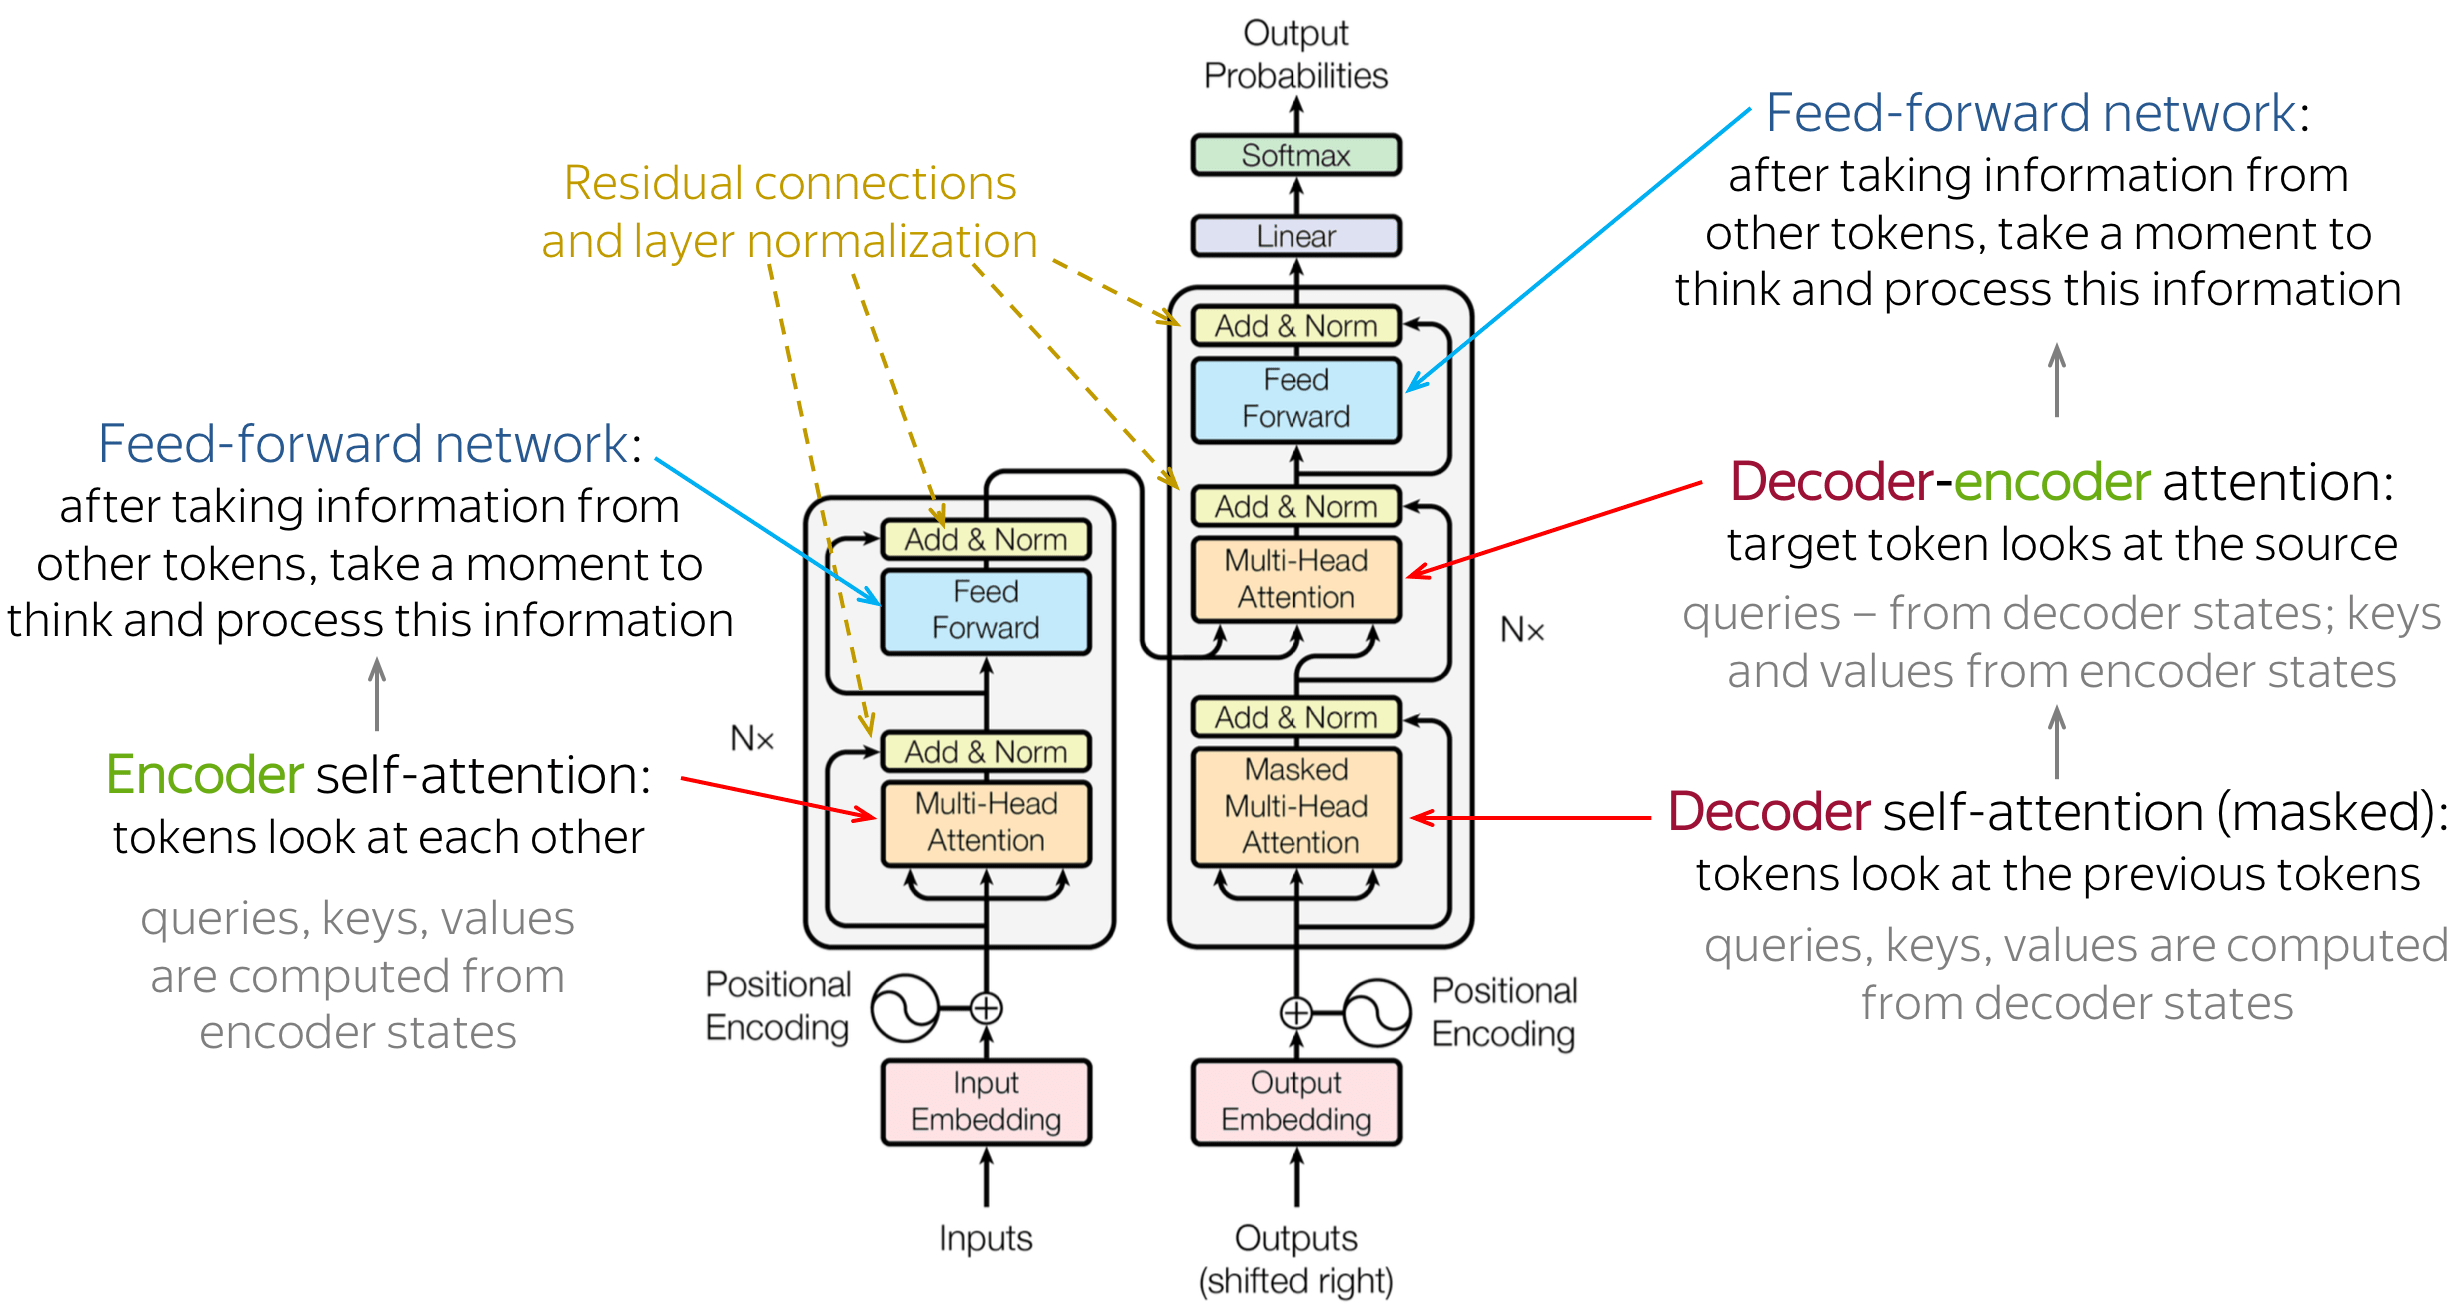

**From this cell, you can start the journey of implementating transformer**

In [ ]:
#==========================Start the implementation of Transformer======================
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class TransformerModel(nn.Module):
    def __init__(self, vocab_size, embed_dim=300, num_heads=6, hidden_dim=256, num_layers=2, dropout=0.1, max_len=100):
        super(TransformerModel, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.positional_encoding = nn.Parameter(torch.randn(1, max_len, embed_dim))  # learned positional encoding

        self.transformer = nn.Transformer(
            d_model=embed_dim,
            nhead=num_heads,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers,
            dim_feedforward=hidden_dim,
            dropout=dropout,
            batch_first=True  # Use (batch, seq, embed)
        )

        self.fc_out = nn.Linear(embed_dim, vocab_size)

    def forward(self, src, tgt):
        src = self.embedding(src) + self.positional_encoding[:, :src.size(1), :]
        tgt = self.embedding(tgt) + self.positional_encoding[:, :tgt.size(1), :]

        tgt_mask = nn.Transformer.generate_square_subsequent_mask(tgt.size(1)).to(tgt.device)

        output = self.transformer(src, tgt, tgt_mask=tgt_mask)
        return self.fc_out(output)

    def sample(self, src, sos_token=1, max_len=20, device=None, temperature=1.0):
        batch_size = src.size(0)
        src_embed = self.embedding(src) + self.positional_encoding[:, :src.size(1), :]
        memory = self.transformer.encoder(src_embed)

        ys = torch.full((batch_size, 1), sos_token, dtype=torch.long, device=device)
        sampled_tokens = []
        log_probs = []

        for i in range(max_len):
            tgt_embed = self.embedding(ys) + self.positional_encoding[:, :ys.size(1), :]
            tgt_mask = nn.Transformer.generate_square_subsequent_mask(ys.size(1)).to(device)
            output = self.transformer.decoder(tgt_embed, memory, tgt_mask=tgt_mask)
            logits = self.fc_out(output[:, -1, :]) / temperature
            probs = F.softmax(logits, dim=-1)

            sampled_token = torch.multinomial(probs, num_samples=1)
            log_prob = torch.log(probs.gather(1, sampled_token) + 1e-8)

            ys = torch.cat([ys, sampled_token], dim=1)
            sampled_tokens.append(sampled_token)
            log_probs.append(log_prob)

        sampled_tokens = torch.cat(sampled_tokens, dim=1)
        log_probs = torch.cat(log_probs, dim=1)
        return sampled_tokens, log_probs



In [ ]:
# from tqdm import tqdm
# checkpoint_dir = "/content/drive/MyDrive/NeuroSymbolic"

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# pad_token_id = 0

# model = TransformerModel(vocab_size=vocab_size).to(device)
# criterion = nn.CrossEntropyLoss(ignore_index=pad_token_id)
# optimizer = optim.Adam(model.parameters(), lr=1e-4)

# num_epochs = 1
# for epoch in range(num_epochs):
#     pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")
#     model.train()
#     total_loss = 0

#     for src, tgt, _, _ in pbar:
#         src = src.to(device)
#         tgt = tgt.to(device)

#         tgt_input = tgt[:, :-1]
#         tgt_output = tgt[:, 1:]

#         optimizer.zero_grad()
#         output = model(src, tgt_input)  # (batch, tgt_seq_len, vocab)

#         loss = criterion(output.reshape(-1, vocab_size), tgt_output.reshape(-1))
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#     avg_loss = total_loss / len(train_loader)
#     print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

#     checkpoint = {
#         'epoch': epoch + 1,
#         'state_dict': model.state_dict(),
#         'optimizer_state_dict': optimizer.state_dict(),
#         'loss': avg_loss,
#     }
#     checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch+1}_transformer.pth")
#     torch.save(checkpoint, checkpoint_path)
#     print(f"Checkpoint saved to {checkpoint_path}")


In [ ]:
# import os
# checkpoint_path = os.path.join("/content/drive/MyDrive/NeuroSymbolic", f"checkpoint_epoch_{epoch+1}_transformer.pth")
# torch.save(checkpoint, checkpoint_path)
# print(f"Checkpoint saved to {checkpoint_path}")


#### prev transformer

In [ ]:
# VQA Paper Settings
vocab_size = 10000  # Set the appropriate vocab size
max_len = 50        # Set the maximum length of input/output sequences
word_vec_dim = 300  # Dimension of word vectors (encoder and decoder)
hidden_size = 256   # Hidden vector dimension for both encoder and decoder
n_layers = 2        # Number of hidden layers for encoder and decoder

transformer_model = TransformerModel(vocab_size, embed_dim=300, num_heads=6, hidden_dim=256, num_layers=2, dropout=0.1).to(device)

**In the following, you need to save the trained model. you are going to use the saved model in the REINFORCE algorithm**

In [ ]:
save_path = "/content/drive/MyDrive/NeuroSymbolic/trained_model_transformer.pth"
torch.save(transformer_model, save_path)
print(f'Model saved to {save_path}')

Model saved to /content/drive/MyDrive/NeuroSymbolic/trained_model_transformer.pth


#### TrainSupervised

In the following, you should implement the supervised training strategy. For the training strategy, you should use the next token prediction loss. To implement this, you can use torch.nn.LLLoss. Some configurations of training strategies for supervised setting can be found in the article [VQA](https://proceedings.neurips.cc/paper_files/paper/2018/file/5e388103a391daabe3de1d76a6739ccd-Paper.pdf).

In [ ]:
from tqdm import tqdm
import torch

num_layers = 1

def train_lstm_epoch(encoder, decoder, optimizer_enc, optimizer_dec, loader, criterion, device, teacher_forcing_ratio=0.5):
    encoder.train()
    decoder.train()
    total_loss = 0.0
    pbar = tqdm(loader, desc=f"Epoch {epoch+1}/{num_epochs}")
    for src, tgt, _, _ in pbar:
        src = src.to(device)   # (batch, src_seq_len)
        tgt = tgt.to(device)   # (batch, tgt_seq_len)
        batch_size, tgt_seq_len = tgt.size()

        optimizer_enc.zero_grad()
        optimizer_dec.zero_grad()

        # Encode
        encoder_outputs, encoder_hidden = encoder(src)
        h_0 = torch.zeros(num_layers, batch_size, decoder_hidden_dim, device=device)
        c_0 = torch.zeros(num_layers, batch_size, decoder_hidden_dim, device=device)
        decoder_hidden = (h_0, c_0)

        # Initialize decoder input with SOS token (assume target[:,0] is SOS)
        decoder_input = tgt[:, 0]

        loss = 0.0
        for t in range(1, tgt_seq_len):
            output_logits, decoder_hidden, _ = decoder(decoder_input, decoder_hidden,encoder_outputs)
            # print(output_logits.shape) #torch.Size([32, 1000])
            loss += criterion(output_logits, tgt[:, t])
            # print("outputlogits[0]", output_logits[0])
            # print(output_logits, tgt)
            print("loss: ", loss)
            # return 0

            # Teacher forcing: decide randomly whether to use true token or model prediction.
            teacher_force = torch.rand(1).item() < teacher_forcing_ratio
            top1 = output_logits.argmax(dim=1)
            decoder_input = tgt[:, t] if teacher_force else top1

        loss.backward()
        optimizer_enc.step()
        optimizer_dec.step()

        if torch.isnan(loss).any():
          print("NaN in loss computation")
          exit()

        total_loss += loss.item() / (tgt_seq_len - 1)
    return total_loss / len(loader)

def train_transformer_epoch(model, optimizer, loader, criterion, device):
    model.train()
    total_loss = 0.0
    pbar = tqdm(loader, desc=f"Epoch {epoch+1}/{num_epochs}")
    for src, tgt, _, _ in pbar:
        src = src.to(device)
        tgt = tgt.to(device)
        # For transformer training using teacher forcing:
        tgt_input = tgt[:, :-1]
        tgt_output = tgt[:, 1:]

        optimizer.zero_grad()
        output = model(src, tgt_input)  # (batch, tgt_seq_len-1, vocab)
        loss = criterion(output.reshape(-1, output.size(-1)), tgt_output.reshape(-1))



        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# ---------------------------
# Evaluation Functions
# ---------------------------
def evaluate_lstm(encoder, decoder, loader, device, max_len=20, pad_token_id=0, sos_token_id=1, eos_token_id=2):
    encoder.eval()
    decoder.eval()
    total_correct = 0
    total_tokens = 0
    with torch.no_grad():
        for src, tgt, _, _ in loader:
            src = src.to(device)
            tgt = tgt.to(device)
            batch_size, tgt_seq_len = tgt.size()

            # Run encoder.
            encoder_outputs, encoder_hidden = encoder(src)
            h_0 = torch.zeros(num_layers, batch_size, decoder_hidden_dim, device=device)
            c_0 = torch.zeros(num_layers, batch_size, decoder_hidden_dim, device=device)
            decoder_hidden = (h_0, c_0)
            # Start generation with SOS (assume tgt[:,0] is SOS).
            decoder_input = tgt[:, 0]
            generated_tokens = []
            for _ in range(max_len - 1):
                output_logits, decoder_hidden, _ = decoder(decoder_input, decoder_hidden,encoder_outputs)
                next_token = output_logits.argmax(dim=1)  # (batch,)
                generated_tokens.append(next_token.unsqueeze(1))
                decoder_input = next_token
            generated = torch.cat(generated_tokens, dim=1)  # (batch, max_len-1)

            # Compare generated tokens with tgt (skip SOS token)
            for i in range(batch_size):
                pred_seq = generated[i].tolist()
                true_seq = tgt[i, 1:].tolist()

                # print("pred seq:", pred_seq)
                # print("true seq:", true_seq)

                # return

                for p, t in zip(pred_seq, true_seq):
                    if t == pad_token_id:
                        break
                    if p == t:
                        total_correct += 1
                    total_tokens += 1
    return total_correct / total_tokens if total_tokens > 0 else 0.0

def evaluate_transformer(model, loader, device, max_len=20, pad_token_id=0, sos_token_id=1, eos_token_id=2):
    model.eval()
    total_correct = 0
    total_tokens = 0
    with torch.no_grad():
        for src, tgt, _, _ in loader:
            src = src.to(device)
            tgt = tgt.to(device)
            batch_size, tgt_seq_len = tgt.size()
            # Use the model's sample method to generate tokens.
            generated ,_ = model.sample(src, sos_token=sos_token_id, max_len=max_len, device=device)
            # Remove SOS token.
            generated = generated[:, 1:]
            # Compare with tgt (skip SOS token of target)
            for i in range(batch_size):
                pred_seq = generated[i].tolist()
                true_seq = tgt[i, 1:].tolist()

                # print("pred seq:", pred_seq)
                # print("true seq:", true_seq)

                for p, t in zip(pred_seq, true_seq):
                    if t == pad_token_id:
                        break
                    if p == t:
                        total_correct += 1
                    total_tokens += 1
    return total_correct / total_tokens if total_tokens > 0 else 0.0

#### Train Both
**In the following cell, you need to plot of the test-accuracy in terms of epoch for both LSTM and Transforemer**

##### bEst res


=== Epoch 1/5 ===


Epoch 1/5: 100%|██████████| 100/100 [00:10<00:00,  9.53it/s]


LSTM Training Loss: nan
LSTM Test Accuracy: 24.41%


Epoch 1/5: 100%|██████████| 100/100 [00:01<00:00, 57.02it/s]


Transformer Training Loss: 1.6997
Transformer Test Accuracy: 96.53%

=== Epoch 2/5 ===


Epoch 2/5: 100%|██████████| 100/100 [00:11<00:00,  9.01it/s]


LSTM Training Loss: nan
LSTM Test Accuracy: 46.79%


Epoch 2/5: 100%|██████████| 100/100 [00:01<00:00, 50.53it/s]


Transformer Training Loss: 0.6186
Transformer Test Accuracy: 99.27%

=== Epoch 3/5 ===


Epoch 3/5: 100%|██████████| 100/100 [00:10<00:00,  9.64it/s]


LSTM Training Loss: nan
LSTM Test Accuracy: 46.59%


Epoch 3/5: 100%|██████████| 100/100 [00:01<00:00, 58.42it/s]


Transformer Training Loss: 0.4529
Transformer Test Accuracy: 99.74%

=== Epoch 4/5 ===


Epoch 4/5: 100%|██████████| 100/100 [00:10<00:00,  9.80it/s]


LSTM Training Loss: nan
LSTM Test Accuracy: 64.87%


Epoch 4/5: 100%|██████████| 100/100 [00:01<00:00, 54.76it/s]


Transformer Training Loss: 0.3798
Transformer Test Accuracy: 99.49%

=== Epoch 5/5 ===


Epoch 5/5: 100%|██████████| 100/100 [00:10<00:00,  9.25it/s]


LSTM Training Loss: nan
LSTM Test Accuracy: 80.04%


Epoch 5/5: 100%|██████████| 100/100 [00:01<00:00, 50.84it/s]


Transformer Training Loss: 0.3157
Transformer Test Accuracy: 98.94%


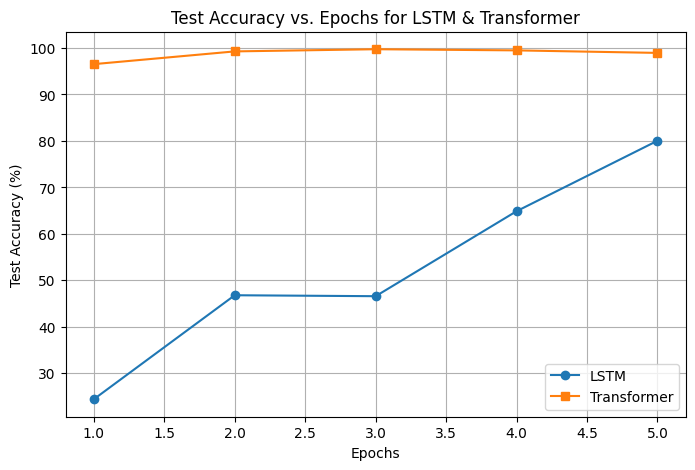

In [ ]:
import itertools

num_epochs = 5
lstm_test_acc = []
transformer_test_acc = []
vocab_size = 1000
embed_dim = 256
encoder_hidden_dim = 512
decoder_hidden_dim = 512
num_layers = 1
dropout = 0.1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate models
lstm_encoder = Encoder(vocab_size, embed_dim, encoder_hidden_dim, num_layers=num_layers, dropout=dropout).to(device)
lstm_decoder = Decoder(vocab_size, embed_dim, encoder_hidden_dim, decoder_hidden_dim, num_layers=num_layers, dropout=dropout).to(device)
optimizer_encoder = optim.Adam(lstm_encoder.parameters(), lr=1e-3)
optimizer_decoder = optim.Adam(lstm_decoder.parameters(), lr=1e-3)
criterion_lstm = nn.CrossEntropyLoss(ignore_index=0)

transformer_model = TransformerModel(vocab_size=vocab_size, embed_dim=300, num_heads=6,
                         hidden_dim=256, num_layers=2, dropout=0.1).to(device)
optimizer_transformer = optim.Adam(transformer_model.parameters(), lr=1e-3)
criterion_transformer = nn.CrossEntropyLoss(ignore_index=0)

partial_train_loader = list(itertools.islice(train_loader, 100))
partial_test_loader = list(itertools.islice(test_loader, 30))

for epoch in range(num_epochs):
    print(f"\n=== Epoch {epoch+1}/{num_epochs} ===")

    # Train LSTM (encoder and decoder separately)
    lstm_loss = train_lstm_epoch(lstm_encoder, lstm_decoder, optimizer_encoder,
                                 optimizer_decoder, partial_train_loader, criterion_lstm, device)
    print(f"LSTM Training Loss: {lstm_loss:.4f}")
    acc_lstm = evaluate_lstm(lstm_encoder, lstm_decoder, partial_test_loader, device)
    lstm_test_acc.append(acc_lstm)
    print(f"LSTM Test Accuracy: {acc_lstm*100:.2f}%")

    # Train Transformer
    transformer_loss = train_transformer_epoch(transformer_model, optimizer_transformer, partial_train_loader, criterion_transformer, device)
    print(f"Transformer Training Loss: {transformer_loss:.4f}")
    acc_transformer = evaluate_transformer(transformer_model, partial_test_loader, device)
    transformer_test_acc.append(acc_transformer)
    print(f"Transformer Test Accuracy: {acc_transformer*100:.2f}%")

# ---------------------------
# Plot test accuracy curves
# ---------------------------
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), [acc*100 for acc in lstm_test_acc], label="LSTM", marker='o')
plt.plot(range(1, num_epochs+1), [acc*100 for acc in transformer_test_acc], label="Transformer", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy (%)")
plt.title("Test Accuracy vs. Epochs for LSTM & Transformer")
plt.legend()
plt.grid(True)
plt.show()

---
### **Reinforce Algorithm**

In this section, we want to use REINFORCE algorithm. Here, you can see the pipline of the algorithm.

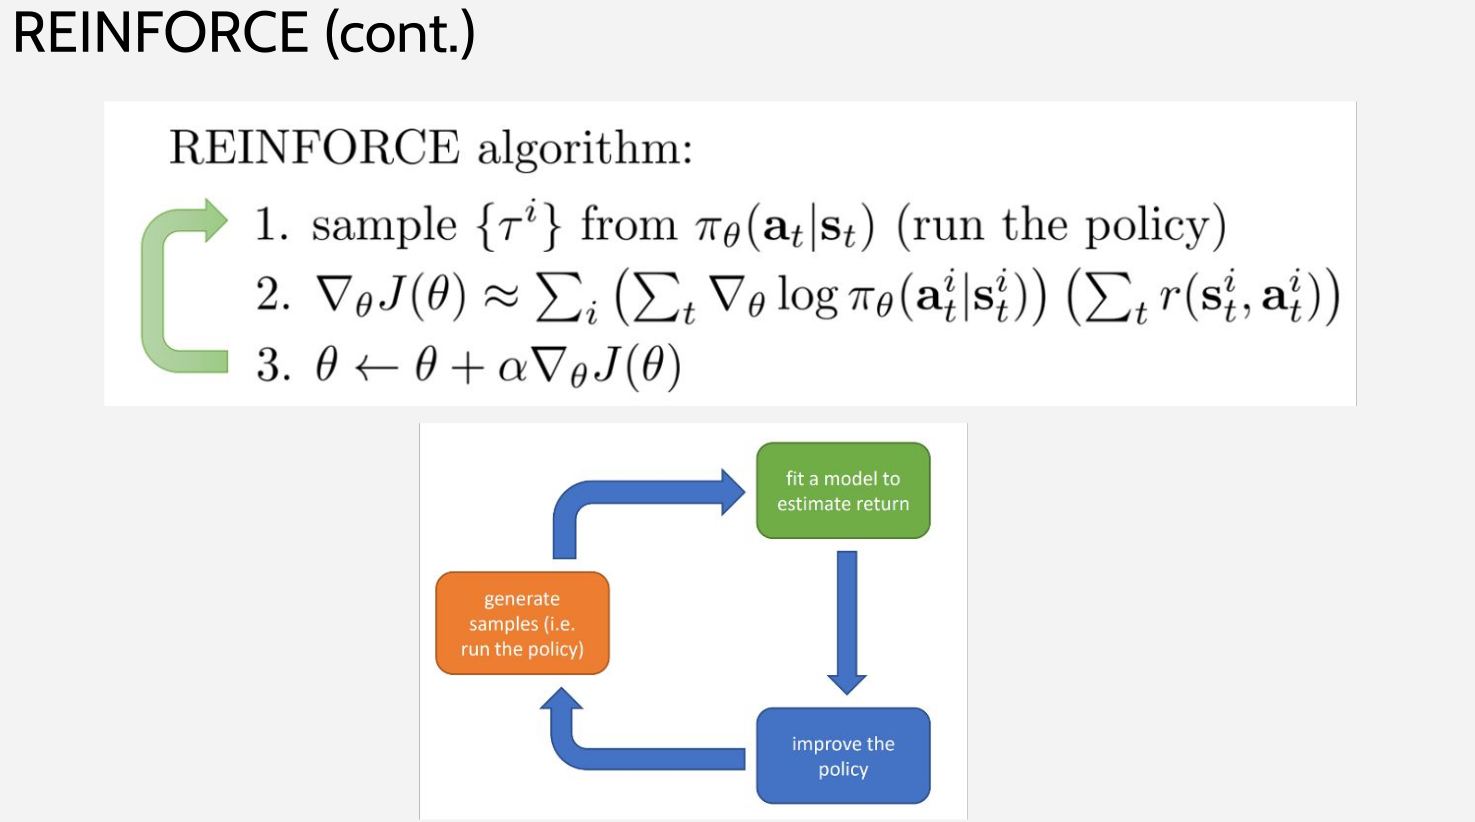



However, for more mathematical details, you can see the course slides of VQA, slides 14-17 and also, it is suggested to see this article [REINFORCE](https://www.semanticscholar.org/paper/Simple-Statistical-Gradient-Following-Algorithms-Williams/4c915c1eecb217c123a36dc6d3ce52d12c742614). In this part, you need to load the trained model in the supervised strategy and fine tune them using the REINFORCE algorithm. Here, a trainer class for REINFORCE has been implemented you need to complete some parts of it and then use it to fine the pretrained model obtained from supervised strategy.  

Please explain the terms reward, baseline and advantage defined in the trian function, see [REINFORCE](https://www.semanticscholar.org/paper/Simple-Statistical-Gradient-Following-Algorithms-Williams/4c915c1eecb217c123a36dc6d3ce52d12c742614).

In the following, you need calculate the reward given the ouput of the decoder in get_batch_reward and then calculate the loss function defined in [REINFORCE](https://www.semanticscholar.org/paper/Simple-Statistical-Gradient-Following-Algorithms-Williams/4c915c1eecb217c123a36dc6d3ce52d12c742614)
and complete the training loop.

##### LSTM Fine tuning

In the following model, you should apply REINFORCE to pretrained LSTM to fine tune it and save the fine tuned model.

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# - The Encoder and Decoder classes are defined and instantiated.
# For instance:
vocab_size = 1000
embed_dim = 256
encoder_hidden_dim = 512
decoder_hidden_dim = 512
num_layers = 1
dropout = 0.1

# Instantiate models
lstm_encoder = Encoder(vocab_size, embed_dim, encoder_hidden_dim, num_layers=num_layers, dropout=dropout)
lstm_decoder = Decoder(vocab_size, embed_dim, encoder_hidden_dim, decoder_hidden_dim, num_layers=num_layers, dropout=dropout)
optimizer_enc = torch.optim.Adam(lstm_encoder.parameters(), lr=1e-3)
optimizer_dec = torch.optim.Adam(lstm_decoder.parameters(), lr=1e-3)

# Move models to device
lstm_encoder.to(device)
lstm_decoder.to(device)

# Load the checkpoint from the first epoch.
checkpoint_path = '/content/drive/MyDrive/NeuroSymbolic/checkpoint_epoch_1.pth'
lstm_checkpoint = torch.load(checkpoint_path, map_location=device)
lstm_encoder.load_state_dict(lstm_checkpoint['encoder_state_dict'])
lstm_decoder.load_state_dict(lstm_checkpoint['decoder_state_dict'])
optimizer_enc.load_state_dict(lstm_checkpoint['encoder_optimizer_state_dict'])
optimizer_dec.load_state_dict(lstm_checkpoint['decoder_optimizer_state_dict'])

In [ ]:
def reinforce_train_lstm(encoder, decoder, optimizer_enc, optimizer_dec, loader, device,
                         max_len=20, sos_token=1, num_batches=None):
    encoder.train()
    decoder.train()
    total_loss = 0
    batch_count = 0

    for i, (src, tgt, *_ ) in enumerate(loader):
        if num_batches and i >= num_batches:
            break

        src, tgt = src.to(device), tgt.to(device)
        batch_size = src.size(0)
        optimizer_enc.zero_grad()
        optimizer_dec.zero_grad()

        # Encode
        encoder_outputs, hidden = encoder(src)
        # Decode using sampling
        h, c = hidden  # For LSTM
        h_combined = (h[0:h.size(0):2] + h[1:h.size(0):2]) / 2
        c_combined = (c[0:c.size(0):2] + c[1:c.size(0):2]) / 2
        hidden = (h_combined, c_combined)
        sampled_tokens, log_probs = decoder.sample(encoder_outputs, hidden, max_len,
                                                   start_token=torch.full((batch_size,), sos_token, dtype=torch.long, device=device))

        # Reward: token-level match
        rewards = []
        for j in range(batch_size):
            # Clip generated tokens to match target length (minus SOS).
            gen_length = min(max_len, tgt_seq_len - 1)
            pred_tokens = sampled_tokens[j, :gen_length]
            # The ground truth (excluding SOS) is assumed to be at tgt[j,1:1+gen_length]
            true_tokens = tgt[j, 1:1+gen_length]
            # Compute token-level accuracy: proportion of tokens that match.
            token_accuracy = (pred_tokens == true_tokens).float().mean().item()
            rewards.append(token_accuracy)
        reward_tensor = torch.tensor(rewards, device=device)  # (batch,)

        # --- Baseline for Variance Reduction ---
        baseline = reward_tensor.mean()
        advantage = reward_tensor - baseline  # (batch,)
        # Sum log probabilities over generated tokens.
        log_prob_sum = log_probs.sum(dim=1)  # (batch,)

        # REINFORCE policy loss (note the negative sign).
        loss = - (log_prob_sum * advantage.detach()).mean()

        loss.backward()
        optimizer_enc.step()
        optimizer_dec.step()

        total_loss += loss.item()
        batch_count += 1

    avg_loss = total_loss / batch_count if batch_count else 0.0
    print(f"[LSTM REINFORCE] Average Loss: {avg_loss:.4f}")
    return avg_loss


##### Transformer Fine tuning

In [ ]:
transformer_model = TransformerModel(vocab_size=vocab_size, embed_dim=300, num_heads=6,
                         hidden_dim=256, num_layers=2, dropout=0.1).to(device)
optimizer_transformer = torch.optim.Adam(transformer_model.parameters(), lr=1e-3)

# Load the saved checkpoint.
checkpoint_path = "transformer_checkpoint.pth"
checkpoint = torch.load("/content/drive/MyDrive/NeuroSymbolic/checkpoint_epoch_1_transformer.pth", map_location=device)

# Load state dictionary into the model.
transformer_model.load_state_dict(checkpoint['state_dict'])
optimizer_transformer.load_state_dict(checkpoint['optimizer_state_dict'])

In [ ]:
def reinforce_train_transformer(model, optimizer, loader, device, max_len=20, sos_token=1, num_batches=None):
    model.train()
    total_loss = 0
    batch_count = 0

    for i, (src, tgt, *_ ) in enumerate(loader):
        if num_batches and i >= num_batches:
            break

        src, tgt = src.to(device), tgt.to(device)
        batch_size = src.size(0)
        optimizer.zero_grad()

        sampled_tokens, log_probs = model.sample(src, sos_token=sos_token, max_len=max_len, device=device)

        # Reward: token-level match
        rewards = []
        for j in range(batch_size):
            gen_length = min(max_len, tgt_seq_len - 1)
            pred_tokens = sampled_tokens[j, :gen_length]
            true_tokens = tgt[j, 1:1+gen_length]
            token_accuracy = (pred_tokens == true_tokens).float().mean().item()
            rewards.append(token_accuracy)
        reward_tensor = torch.tensor(rewards, device=device)

        # --- Baseline ---
        baseline = reward_tensor.mean()
        advantage = reward_tensor - baseline
        log_prob_sum = log_probs.sum(dim=1)  # Sum log-probs over generated tokens.
        loss = - (log_prob_sum * advantage.detach()).mean()

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        batch_count += 1

    avg_loss = total_loss / batch_count if batch_count else 0.0
    print(f"[Transformer REINFORCE] Average Loss: {avg_loss:.4f}")
    return avg_loss


In the following model, you should apply REINFORCE to pretrained Transformer model to fine tune it and save the fine tuned model.

In [ ]:
num_reinforce_epochs = 5  # or more fine-tuning epochs
tgt_seq_len = 12
import itertools

partial_train_loader = list(itertools.islice(train_loader, 1000))
partial_test_loader = list(itertools.islice(test_loader, 300))


for epoch in range(num_reinforce_epochs):
    print(f"\n=== REINFORCE Epoch {epoch+1}/{num_reinforce_epochs} ===")

    # Fine-tune LSTM with REINFORCE (e.g., using only 10 batches for quick iteration)
    lstm_policy_loss = reinforce_train_lstm(lstm_encoder, lstm_decoder, optimizer_enc, optimizer_dec,
                                            partial_train_loader, device, max_len=tgt_seq_len, num_batches=10)
    # Optionally evaluate on test data:
    acc_lstm = evaluate_lstm(lstm_encoder, lstm_decoder, partial_test_loader, device, max_len=tgt_seq_len,
                             pad_token_id=0, sos_token_id=1, eos_token_id=2)
    if acc_lstm:
      print(f"LSTM REINFORCE Test Acc: {acc_lstm*100:.2f}%")
    else:
      print(f"LSTM REINFORCE Test Acc: 100%")

    # Fine-tune Transformer with REINFORCE
    transformer_policy_loss = reinforce_train_transformer(transformer_model, optimizer_transformer,
                                                          partial_train_loader, device, max_len=tgt_seq_len, num_batches=10)
    acc_transformer = evaluate_transformer(transformer_model, partial_test_loader, device, max_len=tgt_seq_len,
                                             pad_token_id=0, sos_token_id=1, eos_token_id=2)
    print(f"Transformer REINFORCE Test Acc: {acc_transformer*100:.2f}%")



=== REINFORCE Epoch 1/5 ===
[LSTM REINFORCE] Average Loss: -0.0065
pred seq: [10, 39, 43, 20, 18, 41, 2, 0, 0, 0, 0]
true seq: [10, 39, 43, 20, 18, 41, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
LSTM REINFORCE Test Acc: 100%
[Transformer REINFORCE] Average Loss: -0.0894
Transformer REINFORCE Test Acc: 0.24%

=== REINFORCE Epoch 2/5 ===
[LSTM REINFORCE] Average Loss: -0.0119
pred seq: [10, 39, 43, 20, 18, 41, 2, 0, 0, 0, 0]
true seq: [10, 39, 43, 20, 18, 41, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
LSTM REINFORCE Test Acc: 100%
[Transformer REINFORCE] Average Loss: -0.1272
Transformer REINFORCE Test Acc: 4.11%

=== REINFORCE Epoch 3/5 ===
[LSTM REINFORCE] Average Loss: -0.0009
pred seq: [10, 39, 43, 20, 18, 41, 2, 0, 0, 0, 0]
true seq: [10, 39, 43, 20, 18, 41, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
LSTM REINFORCE Test Acc: 100%
[Transformer REINFORCE] Average Loss: -0.1610
Transformer REINFORCE Test Acc: 15.98%

=== REINFORCE Epo

In [ ]:
num_reinforce_epochs = 5  # or more fine-tuning epochs
tgt_seq_len = 12
import itertools

partial_train_loader = list(itertools.islice(train_loader, 10000))
partial_test_loader = list(itertools.islice(test_loader, 3000))


for epoch in range(num_reinforce_epochs):
    print(f"\n=== REINFORCE Epoch {epoch+1}/{num_reinforce_epochs} ===")

    # Fine-tune LSTM with REINFORCE (e.g., using only 10 batches for quick iteration)
    lstm_policy_loss = reinforce_train_lstm(lstm_encoder, lstm_decoder, optimizer_enc, optimizer_dec,
                                            partial_train_loader, device, max_len=tgt_seq_len, num_batches=10)
    # Optionally evaluate on test data:
    acc_lstm = evaluate_lstm(lstm_encoder, lstm_decoder, partial_test_loader, device, max_len=tgt_seq_len,
                             pad_token_id=0, sos_token_id=1, eos_token_id=2)
    if acc_lstm:
      print(f"LSTM REINFORCE Test Acc: {acc_lstm*100:.2f}%")
    else:
      print(f"LSTM REINFORCE Test Acc: 100%")

    # Fine-tune Transformer with REINFORCE
    transformer_policy_loss = reinforce_train_transformer(transformer_model, optimizer_transformer,
                                                          partial_train_loader, device, max_len=tgt_seq_len, num_batches=10)
    acc_transformer = evaluate_transformer(transformer_model, partial_test_loader, device, max_len=tgt_seq_len,
                                             pad_token_id=0, sos_token_id=1, eos_token_id=2)
    print(f"Transformer REINFORCE Test Acc: {acc_transformer*100:.2f}%")



=== REINFORCE Epoch 1/5 ===
[LSTM REINFORCE] Average Loss: -0.0166
LSTM REINFORCE Test Acc: 99.97%
[Transformer REINFORCE] Average Loss: -0.0746
Transformer REINFORCE Test Acc: 6.34%

=== REINFORCE Epoch 2/5 ===
[LSTM REINFORCE] Average Loss: -0.0023
LSTM REINFORCE Test Acc: 99.97%
[Transformer REINFORCE] Average Loss: -0.1060
Transformer REINFORCE Test Acc: 7.25%

=== REINFORCE Epoch 3/5 ===
[LSTM REINFORCE] Average Loss: -0.0016
LSTM REINFORCE Test Acc: 99.95%
[Transformer REINFORCE] Average Loss: -0.0857
Transformer REINFORCE Test Acc: 7.71%

=== REINFORCE Epoch 4/5 ===
[LSTM REINFORCE] Average Loss: -0.0339
LSTM REINFORCE Test Acc: 99.96%
[Transformer REINFORCE] Average Loss: -0.1305
Transformer REINFORCE Test Acc: 10.39%

=== REINFORCE Epoch 5/5 ===
[LSTM REINFORCE] Average Loss: -0.0217
LSTM REINFORCE Test Acc: 99.96%
[Transformer REINFORCE] Average Loss: -0.1325
Transformer REINFORCE Test Acc: 13.38%


---
### **In Context Learning and LLM**

In this section which is independent from previous part, you are going to apply **In Context Learning (ICL) techniques** to guide a LLM to produce a desired program for the input question. you need to design the prompt, providing a context for LLM and ask the main question. There is an example of an ICL-based prompt text in the file **prompt_example.txt** you can see. But you need to change it in a way to get better results from LLM.

In [24]:
import torch
from transformers import pipeline
import random
import json
from nltk.translate.bleu_score import sentence_bleu


In [28]:
# =============================== Complete the Code =======================
def get_few_shot_examples(dataset, num_examples):
    """Selects a few-shot examples from the dataset and formats them properly."""
    # few_shot_examples = random.sample(dataset, num_examples)
    sample_index = random.sample(range(len(questions)), num_examples)
    # print(few_shot_examples)


    formatted_examples = []
    # for example in few_shot_examples:
    #     question = example["question"]
    #     program = example.get("program", "N/A")  # Assuming program is available
    #     formatted_examples.append(f"Question: {question}\nProgram: {program}")
    for i in sample_index:
      question = decode(question_idx_to_token, questions[i]).replace("<NULL>", "")
      program = decode(program_idx_to_token, programs[i]).replace("<NULL>", "")
      # print(f"---few shot Question{i+1}: ", question)
      # print(f"---few shot Program{i+1}: ", program)
      formatted_examples.append(f"Question: {question}\nProgram: {program}")


    return "\n\n".join(formatted_examples)



In [ ]:
print(get_few_shot_examples("", 2))

Question: <START> There is a red rubber object in front of the small metal object that is behind the blue metal ball ; what size is it <END>                   
Program: <START> query_size unique filter_material[rubber] filter_color[red] relate[front] unique filter_material[metal] filter_size[small] relate[behind] unique filter_shape[sphere] filter_material[metal] filter_color[blue] scene <END>           

Question: <START> The large sphere on the left side of the purple matte thing on the left side of the cylinder in front of the gray thing is made of what material <END>              
Program: <START> query_material unique filter_shape[sphere] filter_size[large] relate[left] unique filter_material[rubber] filter_color[purple] relate[left] unique filter_shape[cylinder] relate[front] unique filter_color[gray] scene <END>          


In [29]:
# Load an LLM
model_id = "unsloth/Llama-3.2-3B-Instruct"
pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/945 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.43G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
shots = 5
idx = 0
prompt = "You are an AI assistant capable of translating natural language questions into a structured sequence of tool functions to compute the correct answer. Given a question, generate a sequence of function calls. " + get_few_shot_examples(Questiondata_train, num_examples=shots)

Question = "Question: " + Questiondata_test[idx]['question']


messages = [
    {"role": "system", "content": prompt},
   {"role": "user", "content": Question},
]


outputs = pipe(
    messages,
    max_new_tokens=1024,
)
print(Question)
print(outputs[0]["generated_text"][-1]['content'])

Question: Are there any other things that are the same shape as the yellow matte object?
To determine if there are any other things that are the same shape as the yellow matte object, I will generate the following sequence of function calls:

<START> 
equal_shape query_shape unique filter_color[yellow] filter_material[matte] scene
</START>


In the following, you need to plot the accuracy of the LLM model in test data in terms of **the number of examples provided for LLM in the context**. Here, we can use two strategy to evaluate the performance.

- Using the exectuor

- Using the comparision with ground truth program


In [39]:
import utils.preprocess as preprocess_utils
import utils.programs as program_utils

def program_to_str(program, mode):
    if mode == 'chain':
        if not program_utils.is_chain(program):
            return None
        return program_utils.list_to_str(program)
    elif mode == 'prefix':
        program_prefix = program_utils.list_to_prefix(program)
        return program_utils.list_to_str(program_prefix)
    elif mode == 'postfix':
        program_postfix = program_utils.list_to_postfix(program)
        return program_utils.list_to_str(program_postfix)
    return None

# index = 10
# print("question: ",Questiondata_test[index].get("question", "") )
# program_str = program_to_str(Questiondata_test[index].get("program", ""), 'prefix')
# print(program_str)
# program_tokens = preprocess_utils.tokenize(program_str)
# print(program_tokens)
# ep = preprocess_utils.encode(program_tokens, vocab_json["program_token_to_idx"])
# print(ep)
# print("reconstructed Program: ", decode(program_idx_to_token, ep))

In [ ]:
index = 50
executer_ans = executor.run(ep, index,"val")
print("answer: ",executer_ans)
print("gt: ",Questiondata_test[index].get("answer", ""))

answer:  yes
gt:  yes


In [35]:
Questiondata_test = DataLoader(test_dataset, batch_size=32, shuffle=True)
for sample_idx, sample in enumerate(Questiondata_test):
  print(sample[1].tolist()[0])
  print(decode(program_idx_to_token,sample[1].tolist()[0]).replace("<NULL>", ""))
  break

[1, 30, 43, 23, 37, 43, 21, 41, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
<START> What is the material of the ball that is the same color as the block <END>                             


In [ ]:
# Define a list of few-shot example counts to test.
all_gen_progs = []
shots_list = [0, 1, 3, 5, 7, 10]

executor_accuracies = []       # Percentage of test questions for which executor returns correct answer.
complete_match_accuracies = []  # Percentage of test questions with an exact program match.
bleu_scores = []               # Average BLEU score over test questions.

random.seed(42)

Questiondata_test = test_dataset
num_samples = 5

for shots in shots_list:
    total_executor_correct = 0
    total_exact_matches = 0
    total_bleu = 0.0
    count = 0

    for sample_idx, sample in enumerate(Questiondata_test):
        count += 1
        if count > num_samples:
          break
        question = decode(question_idx_to_token,sample[0]).replace("<NULL>", "")
        ground_truth_program = decode(program_idx_to_token, sample[1]).replace("<NULL>", "")
        ground_truth_answer = answer_idx_to_token[sample[2]]

        # Build the prompt:
        few_shot_context = get_few_shot_examples(Questiondata_train, shots)

        with open('/content/drive/MyDrive/NeuroSymbolic/clevr_program_prompt2.txt', 'r') as f:
          system_prompt = f.read()

        prompt = system_prompt

        if few_shot_context:
            prompt += "\n\nExamples of input question and its corresponding program:\n"
            prompt += few_shot_context + "\n\n"

        prompt += f"\nQuestion: {question}\nProgram:"
        print(question)

        outputs = pipe(
            prompt,
            max_new_tokens=200,
            do_sample=True,
            temperature=0.7,
        )
        generated_text = outputs[0]["generated_text"]

        # Remove the prompt from the generated text (assume the generated program follows after the prompt).
        generated_program = generated_text[len(prompt):].splitlines()[0].strip()
        all_gen_progs.append([generated_program, str(ground_truth_program)])

        # ----- Strategy 1: Using the executor -----
        # Execute the generated program to get a predicted answer.
        try:
          program_tokens = preprocess_utils.tokenize(generated_program)
          ep = preprocess_utils.encode(program_tokens, vocab_json["program_token_to_idx"])[1:-1]
          exec_predicted_answer = executor.run(ep, sample_idx, "val")

          sp = sample[1].tolist()
          while sp and sp[-1] == 0:
            sp.pop()

          print("ep: ",ep)
          print("sp: ", sp)

          exec_ground_truth_answer = executor.run(sp, sample_idx, "val")
          print("$$predicted answer: ", exec_predicted_answer, exec_ground_truth_answer)

          if exec_predicted_answer.strip() == exec_ground_truth_answer.strip():
              total_executor_correct += 1

        except Exception as e:
          print("Bad Format, ", e)

        # ----- Strategy 2: Direct program comparison -----
        # Exact (complete) match:
        print("\nGround Truth Program: ", ground_truth_program)
        print("Generated Program   : ",generated_program)
        if generated_program.strip() == ground_truth_program.strip():
            print("*_* Exact match!")
            total_exact_matches += 1

        # ----- Strategy 2: BLEU program comparison -----
        # BLEU score between ground truth program and generated program.
        reference = str(ground_truth_program).split()
        hypothesis = generated_program.split()
        # To avoid issues with empty references/hypotheses.
        if len(reference) > 0 and len(hypothesis) > 0:
            bleu = sentence_bleu([reference], hypothesis)
            print("\nBLEU: ", bleu)
        else:
            bleu = 0.0
        total_bleu += bleu

    # Compute average scores over test samples.
    executor_acc = total_executor_correct / num_samples if num_samples > 0 else 0
    complete_match_acc = total_exact_matches / num_samples if num_samples > 0 else 0
    avg_bleu = total_bleu / num_samples

    executor_accuracies.append(executor_acc)
    complete_match_accuracies.append(complete_match_acc)
    bleu_scores.append(avg_bleu)
    print("___________________________________________________________________\n")
    print(f"Shots: {shots} -> Executor Acc: {executor_acc:.4f}, Complete Match: {complete_match_acc:.4f}, Avg BLEU: {avg_bleu:.4f}")
    print("___________________________________________________________________\n")


------------------------------------------
 <START> Are there any other things that are the same shape as the yellow matte object <END>                             
Bad Format,  'Token "[relate[right]," not in vocab'

Ground Truth Program:  <START> exist same_shape unique filter_material[rubber] filter_color[yellow] scene <END>                   
Generated Program   :  [relate[right], filter_color[yellow], filter_material[matte], same_shape, exist, query_color[yellow], query_material[matte], equal_color, relate[left], intersect]

BLEU:  0
------------------------------------------
 <START> Is there any other thing that has the same shape as the brown thing <END>                              
Bad Format,  'Token "[(query_shape," not in vocab'

Ground Truth Program:  <START> exist same_shape unique filter_color[brown] scene <END>                    
Generated Program   :  [(query_shape, brown), (same_shape, scene), (exist, scene), (query_shape, same_shape), (exist, same_shape)]

BLEU:  0

#### Exectuor Evaluation

Here, you only need to compare the result of program generated by LLM with the ground truth answer in test data.

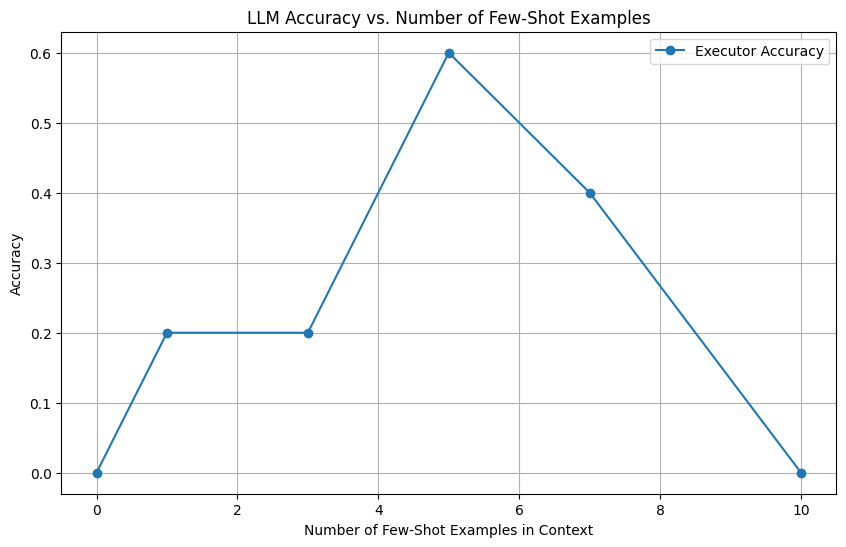

In [ ]:
import matplotlib.pyplot as plt

#====================Plot the accuracy Curve=========================
plt.figure(figsize=(10, 6))
plt.plot(shots_list, executor_accuracies, marker='o', label="Executor Accuracy")
# plt.plot(shots_list, complete_match_accuracies, marker='s', label="Exact Match Accuracy")
plt.xlabel("Number of Few-Shot Examples in Context")
plt.ylabel("Accuracy")
plt.title("LLM Accuracy vs. Number of Few-Shot Examples")
plt.legend()
plt.grid(True)
plt.show()

#### Comparision approach
you need use some scores for comparision two sequences: Ground truth programs and the output program of the LLM. There are many approaches to calculate the similirity between two sequences. Here, you can use complete match or BLEU.

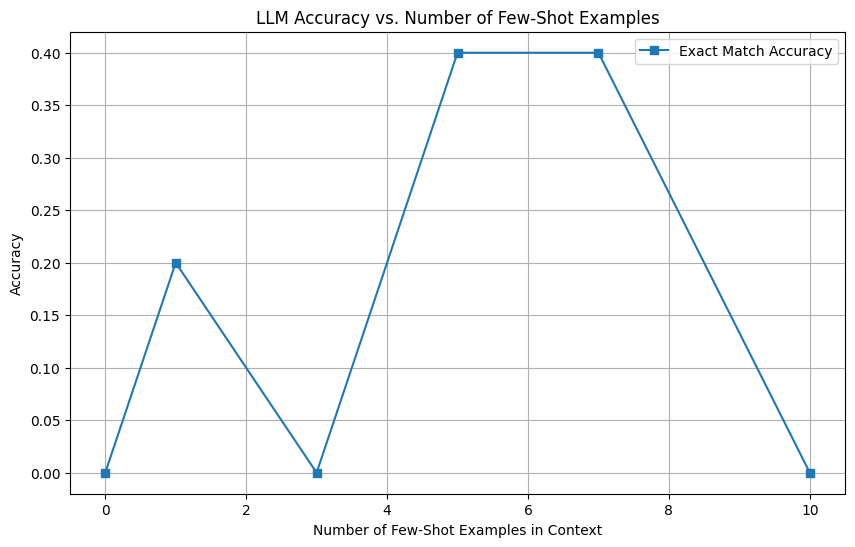

In [ ]:
#====================Plot the score Curve=========================
plt.figure(figsize=(10, 6))
# plt.plot(shots_list, executor_accuracies, marker='o', label="Executor Accuracy")
plt.plot(shots_list, complete_match_accuracies, marker='s', label="Exact Match Accuracy")
plt.xlabel("Number of Few-Shot Examples in Context")
plt.ylabel("Accuracy")
plt.title("LLM Accuracy vs. Number of Few-Shot Examples")
plt.legend()
plt.grid(True)
plt.show()

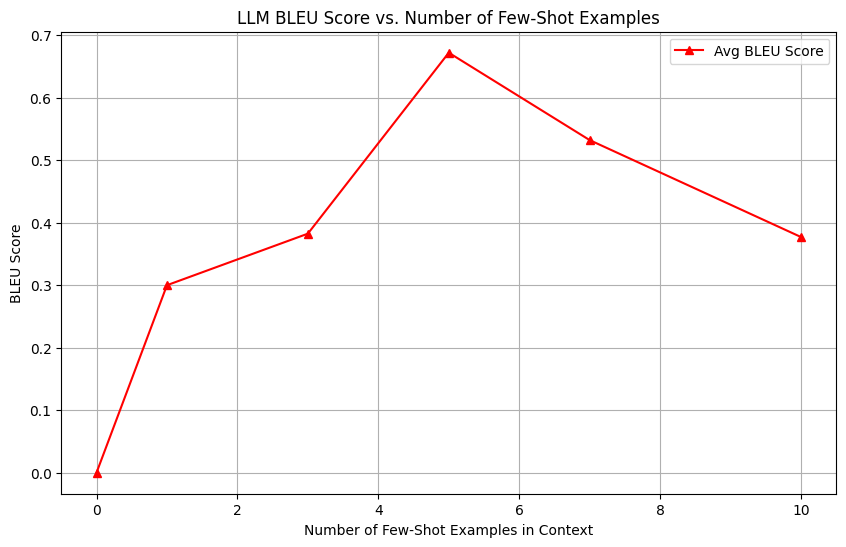

In [ ]:
#========================= Plot the score Curve ===================
plt.figure(figsize=(10, 6))
plt.plot(shots_list, bleu_scores, marker='^', color='r', label="Avg BLEU Score")
plt.xlabel("Number of Few-Shot Examples in Context")
plt.ylabel("BLEU Score")
plt.title("LLM BLEU Score vs. Number of Few-Shot Examples")
plt.legend()
plt.grid(True)
plt.show()